# QuTiP example: Landau-Zener transitions

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [137]:
%matplotlib inline

In [138]:
import matplotlib.pyplot as plt

In [139]:
import numpy as np

In [140]:
from qutip import *

In [141]:
import time

In [142]:
def hamiltonian_t(t, args):
    """ evaluate the hamiltonian at time t. """
    H0 = args[0]
    H1 = args[1]

    return H0 + t * H1

In [143]:
def qubit_integrate(delta, eps0, A, gamma1, gamma2, psi0, tlist):

    # Hamiltonian
    sx = sigmax()
    sz = sigmaz()
    sm = destroy(2)

    H0 =  delta/2.0 * sx + eps0/2.0 * sz
    H1 =  A/2.0 * sz        

    # collapse operators
    c_op_list = []

    n_th = 0.0 # zero temperature

    # relaxationhttp://localhost:8888/notebooks/jupyter_notebook/project/LZ_T/landau-zener.ipynb#
    rate = gamma1 * (1 + n_th)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)

    # excitation
    rate = gamma1 * n_th
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm.dag())

    # dephasing 
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sz)

    # evolve and calculate expectation values

    # method 1: function callback which returns the time-depdent qobj
    #H_args = (H0, H1)
    #output = mesolve(hamiltonian_t, psi0, tlist, c_op_list, [sm.dag() * sm], H_args)  

    # method 2: a function callback that returns the coefficient for a qobj
    #H = [H0, [H1, lambda x,y: x]]
    #output = mesolve(H, psi0, tlist, c_op_list, [sm.dag() * sm], {})  

    # method 3: a string that defines the coefficient. The solver generates
    # and compiles C code using cython. This method is usually the fastest
    # for large systems or long time evolutions, but there is fixed-time
    # overhead that makes it inefficient for small and short-time evolutions.
    H = [H0, [H1, 't']]
    output = mesolve(H, psi0, tlist, c_op_list, [sm.dag() * sm], {})  

    return output.expect[0]

In [144]:
#
# set up the calculation
#
delta = 0.5 * 2 * np.pi   # qubit sigma_x coefficient
eps0  = 0.0 * 2 * np.pi   # qubit sigma_z coefficient
A     = 2.0 * 2 * np.pi   # sweep rate
gamma1 = 0.0          # relaxation rate
gamma2 = 0.0           # dephasing  rate
psi0 = basis(2,0)      # initial state

tlist = np.linspace(-20.0, 40.0, 5000)

In [145]:
start_time = time.time()
p_ex = qubit_integrate(delta, eps0, A, gamma1, gamma2, psi0, tlist)
print('time elapsed = ' + str(time.time() - start_time))

time elapsed = 5.542918682098389


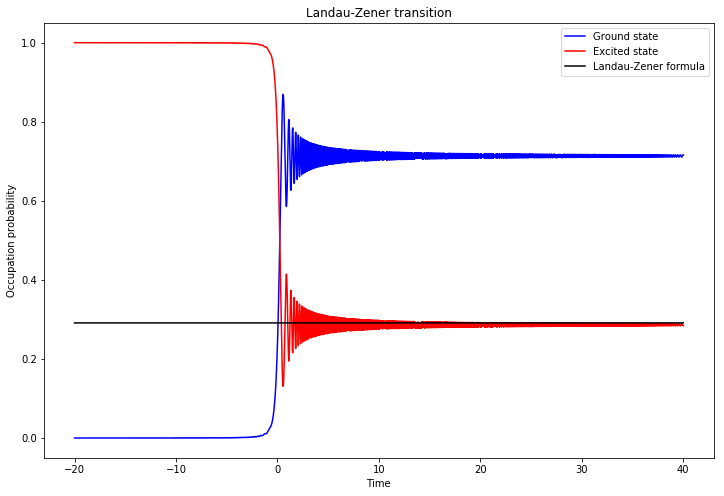

In [146]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(tlist, np.real(p_ex), 'b', tlist, np.real(1-p_ex), 'r')
ax.plot(tlist, np.exp(-np.pi * delta **2 / (2 * A)) * np.ones(shape(tlist)), 'k')
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Landau-Zener transition')
ax.legend(("Ground state", "Excited state", "Landau-Zener formula"), loc=0);